In [1]:
# numpy handles pretty much anything that is a number/vector/matrix/array
import numpy as np
# pandas handles dataframes (exactly the same as tables in Matlab)
import pandas as pd
# matplotlib emulates Matlabs plotting functionality
import matplotlib.pyplot as plt
# stats models is a package that is going to perform the regression analysis
from statsmodels import api as sm
from scipy import stats
from sklearn.metrics import mean_squared_error
# os allows us to manipulate variables on out local machine, such as paths and environment variables
import os
# self explainatory, dates and times
from datetime import datetime, date
# a helper package to help us iterate over objects
import itertools

#import linear regressor model from sk learn 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

In [2]:
if __name__=="__main__":
    
    #extract data from csv 
    data = pd.read_csv('CAB420_Assessment_1A_Data/Data/Q1/communities.csv')

In [3]:
#clean data 
occurrences = np.count_nonzero(data == '?',axis = 0)
print(occurrences)
print(occurrences.shape)
#remove first 5 columns 
data.drop([" state ", " county "," community "," communityname string"," fold "], axis = 1, inplace = True)
#remove columns with missing data
    #most sample didnt have values 1675 out of 1994
data.drop([" PolicBudgPerPop ", " LemasGangUnitDeploy "," LemasPctPolicOnPatr "," PolicOperBudg "," PolicCars "], axis = 1, inplace = True) 
data.drop([data.columns[112],data.columns[111],data.columns[110],data.columns[109],data.columns[108],data.columns[107],data.columns[106],data.columns[105],data.columns[104],data.columns[103],data.columns[102],data.columns[101],data.columns[100],data.columns[99],data.columns[98],data.columns[97],data.columns[96]], axis = 1, inplace = True) 
#remove row with missing value 

# Get indexes where name column has value ?
indexNames = data[data[' OtherPerCap '] == '?'].index
# Delete these row indexes from dataFrame
data.drop(indexNames , inplace=True)
#print(data.head)

[   0 1174 1177    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    1    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0 1675 1675 1675 1675 1675 1675 1675 1675 1675 1675 1675
 1675 1675 1675 1675 1675 1675    0    0    0 1675 1675 1675 1675    0
 1675    0]
(128,)


In [4]:
#check for no values 
occurrences = np.count_nonzero(data == '?',axis = 0)
#standardization of inputs
pass # todo 
#get X and Y 
X = data.iloc[:, :100]
Y = data.iloc[:, 100:]

In [5]:
#Standardise data set
def standardise(data):
  mu = np.mean(data, axis=0)
  sigma = np.std(data, axis=0)
  scaled = (data - mu) / sigma
  return scaled, mu, sigma




In [6]:
#shuffle data
X, Y = shuffle(X, Y, random_state=None)

#splite data into testing/validation/training
X_train, X_remaining, Y_train, Y_remaining = train_test_split(X,Y, train_size = .6, random_state = 0)
X_test, X_valid, Y_test, Y_valid = train_test_split(X_remaining,Y_remaining, train_size = .5, random_state = 0)
#conver dp to numpy array 



In [7]:
X_train_std, mu_train_x, sigma_train_x = standardise(X_train)
Y_train_std, mu_train_y, sigma_train_y = standardise(Y_train)
X_val_std = (X_valid - mu_train_x)/sigma_train_x
Y_val_std = (Y_valid - mu_train_y)/sigma_train_y
X_test_std = (X_test - mu_train_x)/sigma_train_x
Y_test_std = (Y_test - mu_train_y)/sigma_train_y

X_train_std = X_train.to_numpy()
X_test_std = X_test.to_numpy()
X_val_std = X_valid.to_numpy()
Y_train_std = Y_train.to_numpy()
Y_test_std = Y_test.to_numpy()
Y_val_std = Y_valid.to_numpy()

In [8]:
#create linear regressor 
print("linear regressor ---------------------------")



clf = GridSearchCV(LinearRegression(),{
'copy_X' : [True,False],
'normalize' : [True,False],
'fit_intercept' : [True,False],
},cv = 4,return_train_score = False)
clf.fit(X_val_std,Y_val_std)
#print(clf.cv_results_)
print(clf.best_score_)
print(clf.best_params_)

LR = LinearRegression(copy_X= True, fit_intercept= False, normalize= True)
#{'copy_X': True, 'fit_intercept': False, 'n_jobs': None, 'normalize': True}
LR.fit(X_train_std,Y_train_std)    

pred = LR.predict(X_test_std)

#get R2, adj R2,mean absoulte error 


# The coefficients
print('Coefficients: \n', LR.coef_)
print('Training score: %.2f'%LR.score(X_train_std,Y_train_std))
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(Y_test, pred))
# The coefficient of determination: 1 is perfect prediction
print('R2: %.2f' % r2_score(Y_test_std, pred))

linear regressor ---------------------------
0.5416599243528095
{'copy_X': True, 'fit_intercept': True, 'normalize': False}
Coefficients: 
 [[ 0.35256501  0.12655014  0.22326     0.03990115  0.02804465  0.10867459
   0.04831665  0.1253346  -0.24169081  0.26900948 -0.31787204  0.05021506
  -0.19996451 -0.12770457  0.05351961 -0.14964249  0.08743691 -0.0142314
  -0.06003276  0.30141204 -0.24996167 -0.08238123 -0.03614532 -0.04932825
   0.0276529   0.03094083  0.04470812  0.31386372 -0.20208331 -0.04400711
  -0.01098764  0.12281891  0.0723135   0.30905194 -0.0557794  -0.09812955
   0.10815864  0.19005034  0.6352204   0.09238971  0.46791733 -1.0010273
  -0.19661675 -0.27022371 -0.1298967  -0.02368256  0.03383661  0.05218438
  -0.17153126 -0.37334794  0.20054122 -0.31255069  0.01618057  0.06630733
  -0.16696046  0.09573269  0.0423627  -0.39819478  0.69123136 -0.40920449
   0.0400414  -0.16333652 -0.03434223 -0.19443513  0.20267992  0.38354344
  -0.2478094  -1.18303549  0.33878473  0.1137559

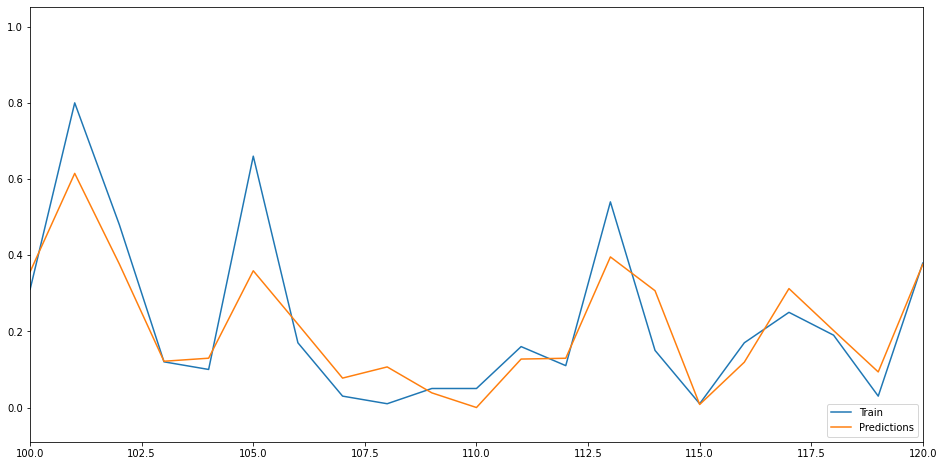

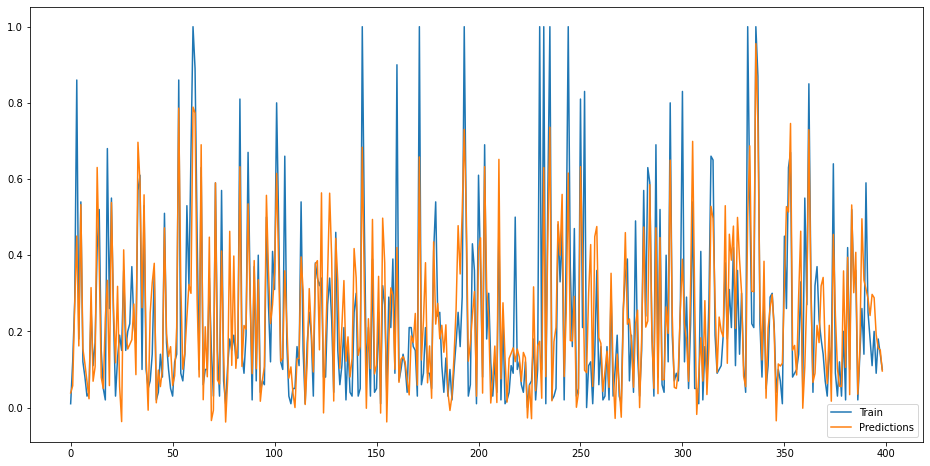

In [9]:

#visualise
plt.figure(figsize=(16,8))
plt.plot(Y_test_std)
plt.plot(pred)
plt.legend(['Train','Predictions'],loc='lower right')
#plt.title('Linear Regression Model - T1v1 - Trained on 50%')
#plt.xlabel("Samples")
#plt.ylabel("Resistance (KN) ")
plt.xlim((100,120))
plt.show()

plt.figure(figsize=(16,8))
plt.plot(Y_test_std)
plt.plot(pred)
plt.legend(['Train','Predictions'],loc='lower right')
#plt.title('Linear Regression Model - T1v1 - Trained on 50%')
#plt.xlabel("Samples")
#plt.ylabel("Resistance (KN) ")
plt.show()

In [10]:
print("Lasso---------------------------------")



clf = GridSearchCV(linear_model.Lasso(copy_X= True, fit_intercept= False, normalize= True),{
        'alpha' : [.0001,.0002,.0004,.0006,.0008,.002,.004,.006,.008,.01,.02,.04],
        },cv = 4,return_train_score = False)
clf.fit(X_val_std,Y_val_std)


print(clf.cv_results_)
print(clf.best_score_)
print(clf.best_params_)

#create lasso regression model
LR_lasso = linear_model.Lasso(alpha=.002,copy_X= True, fit_intercept= False, normalize= True)
LR_lasso.fit(X_train_std,Y_train_std) 
pred_lasso = LR_lasso.predict(X_test_std)

#get R2, adj R2,mean absoulte error 





Lasso---------------------------------


/home/kaiyun/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.40184323552515533, tolerance: 0.0037540199999999994
  model = cd_fast.enet_coordinate_descent(
/home/kaiyun/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6596383543828435, tolerance: 0.003687619999999999
  model = cd_fast.enet_coordinate_descent(
/home/kaiyun/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8486809015208538, tolerance: 0.003591219999999999
  model = cd_fast.enet_coordinate_descent(
/home/kaiyun/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate

{'mean_fit_time': array([0.10764807, 0.07841825, 0.06580532, 0.06328022, 0.07452857,
       0.03015697, 0.01839393, 0.00706559, 0.00553238, 0.00456619,
       0.00408477, 0.00424516]), 'std_fit_time': array([0.05876405, 0.01861389, 0.0120544 , 0.04254367, 0.03784671,
       0.0083732 , 0.00239614, 0.00334175, 0.00118727, 0.00020836,
       0.00045378, 0.00103537]), 'mean_score_time': array([0.01008397, 0.00203872, 0.00195765, 0.00384086, 0.00288361,
       0.00256771, 0.00211245, 0.00089204, 0.00087321, 0.00086367,
       0.00086278, 0.0009048 ]), 'std_score_time': array([8.21666705e-03, 2.75081990e-04, 3.18605555e-04, 4.87865675e-03,
       1.52350320e-03, 7.04618256e-04, 8.23499936e-04, 2.96663520e-05,
       3.03852764e-05, 1.03931086e-05, 1.64460222e-05, 6.33341353e-05]), 'param_alpha': masked_array(data=[0.0001, 0.0002, 0.0004, 0.0006, 0.0008, 0.002, 0.004,
                   0.006, 0.008, 0.01, 0.02, 0.04],
             mask=[False, False, False, False, False, False, False, False

/home/kaiyun/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.016426586698372603, tolerance: 0.00491572
  model = cd_fast.enet_coordinate_descent(


In [11]:
# The coefficients
print('Coefficients: \n', LR_lasso.coef_)
#The train data R2
print('Training score:%.2f'%LR.score(X_train_std,Y_train_std))
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(Y_test_std, pred_lasso))
# The coefficient of determination: 1 is perfect prediction
print('R2: %.2f' % r2_score(Y_test_std, pred_lasso))

Coefficients: 
 [ 0.         -0.          0.14888422 -0.01874832  0.          0.
 -0.         -0.         -0.          0.01283593  0.          0.03459094
 -0.         -0.          0.         -0.          0.          0.04639735
  0.         -0.          0.          0.         -0.         -0.
  0.          0.          0.          0.          0.          0.
  0.         -0.          0.         -0.         -0.         -0.
 -0.          0.          0.16681654  0.          0.          0.03379903
  0.         -0.         -0.02779208 -0.         -0.         -0.
 -0.          0.          0.32291602  0.          0.         -0.
  0.          0.          0.          0.          0.          0.
 -0.          0.          0.          0.         -0.         -0.
  0.         -0.          0.13836933  0.01886342 -0.          0.08223541
 -0.03883972 -0.          0.00346066 -0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.  

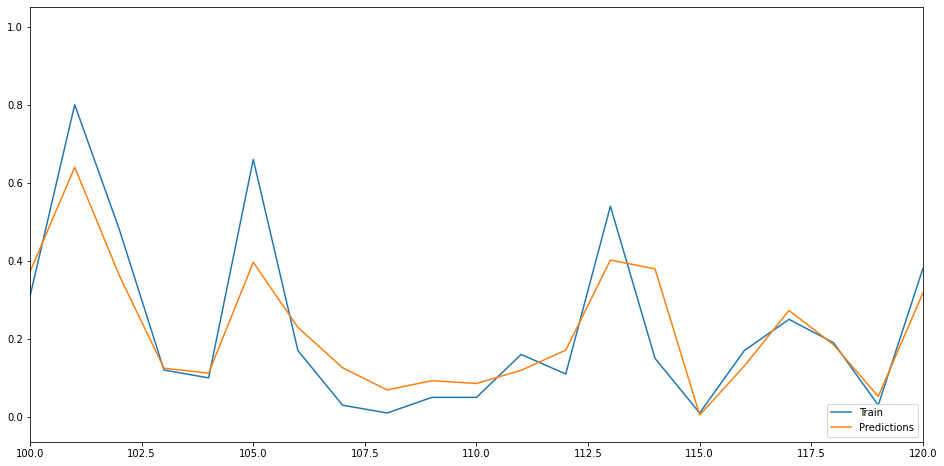

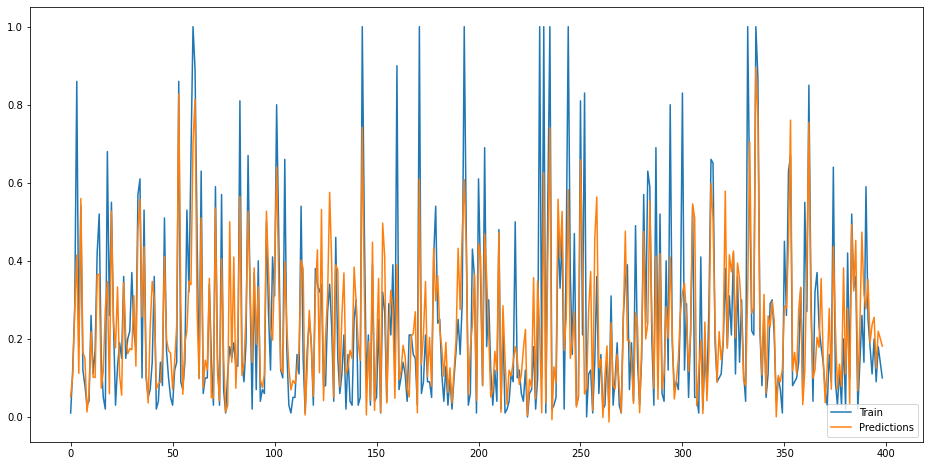

In [12]:
#visualise
plt.figure(figsize=(16,8))
plt.plot(Y_test_std)
plt.plot(pred_lasso)
plt.legend(['Train','Predictions'],loc='lower right')
#plt.title('Linear Regression Model - T1v1 - Trained on 50%')
#plt.xlabel("Samples")
#plt.ylabel("Resistance (KN) ")
plt.xlim((100,120))
plt.show()

plt.figure(figsize=(16,8))
plt.plot(Y_test_std)
plt.plot(pred_lasso)
plt.legend(['Train','Predictions'],loc='lower right')
#plt.title('Linear Regression Model - T1v1 - Trained on 50%')
#plt.xlabel("Samples")
#plt.ylabel("Resistance (KN) ")
plt.show()

In [13]:
print("Ridge---------------------------")

clf = GridSearchCV(linear_model.Ridge(copy_X= True, fit_intercept= False, normalize= True),{
        'alpha' : [1,5,10,15,20,25,30,35,40,45,50,55,60],
        },cv = 4,return_train_score = False)
clf.fit(X_val_std,Y_val_std)


#print(clf.cv_results_)
print(clf.best_score_)
print(clf.best_params_)

#create ridge regression model
LR_Ridge = linear_model.Ridge(alpha=15)
LR_Ridge.fit(X_train_std,Y_train_std) 
pred_Ridge = LR_Ridge.predict(X_test_std)

#get R2, adj R2,mean absoulte error 

# The coefficients
print('Coefficients: \n', LR_Ridge.coef_)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(Y_test_std, pred_Ridge))
# The coefficient of determination: 1 is perfect prediction
print('R2: %.2f' % r2_score(Y_test_std, pred_Ridge))

Ridge---------------------------
0.6547018806940978
{'alpha': 5}
Coefficients: 
 [[ 7.73126893e-03  8.71553624e-03  1.26000821e-01 -8.92545441e-02
  -2.84124504e-03  1.65949283e-02 -2.76303490e-02 -1.95797870e-02
  -1.81584475e-02  2.39753061e-02  7.57161324e-03  3.59674247e-02
  -1.19886183e-03 -1.90914133e-02  5.25554151e-03 -4.38942280e-02
   1.87774917e-02  2.31200779e-02 -2.39912150e-02 -5.50345716e-03
  -8.25029958e-03  1.08705712e-02 -3.09997888e-02 -2.58201510e-02
   1.82620703e-02  2.36766961e-02  1.54687906e-02  1.20415099e-02
  -1.87925419e-02 -1.11583415e-02  1.15594089e-02  4.29068182e-03
   4.21373381e-04  8.16783779e-03 -1.76614349e-02 -2.00562453e-02
   8.58643012e-03  2.07622302e-04  5.23096135e-02  2.09449552e-02
   2.12429750e-02  3.25743581e-02  4.31584512e-03 -6.66108948e-02
  -7.96522388e-02 -5.94448480e-02 -3.01593651e-02  4.34192090e-03
  -2.56934040e-02  1.23052129e-02  1.30959519e-01 -1.10263136e-02
   6.91944277e-03 -1.08657939e-02 -1.25854106e-02  6.69369150

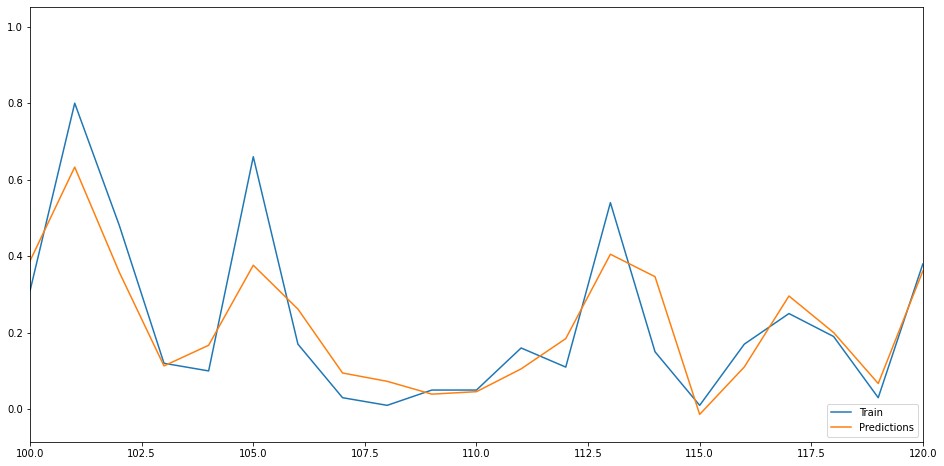

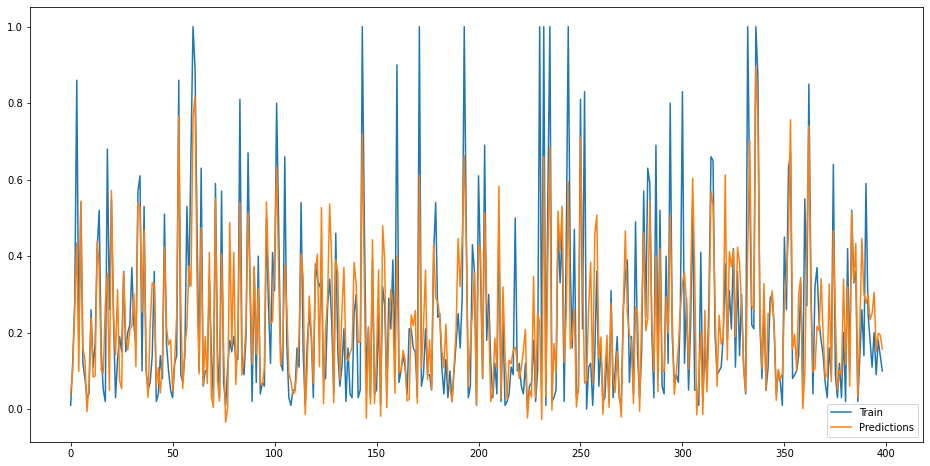

In [14]:
#visualise
plt.figure(figsize=(16,8))
plt.plot(Y_test_std)
plt.plot(pred_Ridge)
plt.legend(['Train','Predictions'],loc='lower right')
#plt.title('Linear Regression Model - T1v1 - Trained on 50%')
#plt.xlabel("Samples")
#plt.ylabel("Resistance (KN) ")
plt.xlim((100,120))
plt.show()

plt.figure(figsize=(16,8))
plt.plot(Y_test_std)
plt.plot(pred_Ridge)
plt.legend(['Train','Predictions'],loc='lower right')
#plt.title('Linear Regression Model - T1v1 - Trained on 50%')
#plt.xlabel("Samples")
#plt.ylabel("Resistance (KN) ")
plt.show()

#select lambda

#

In [15]:
pass